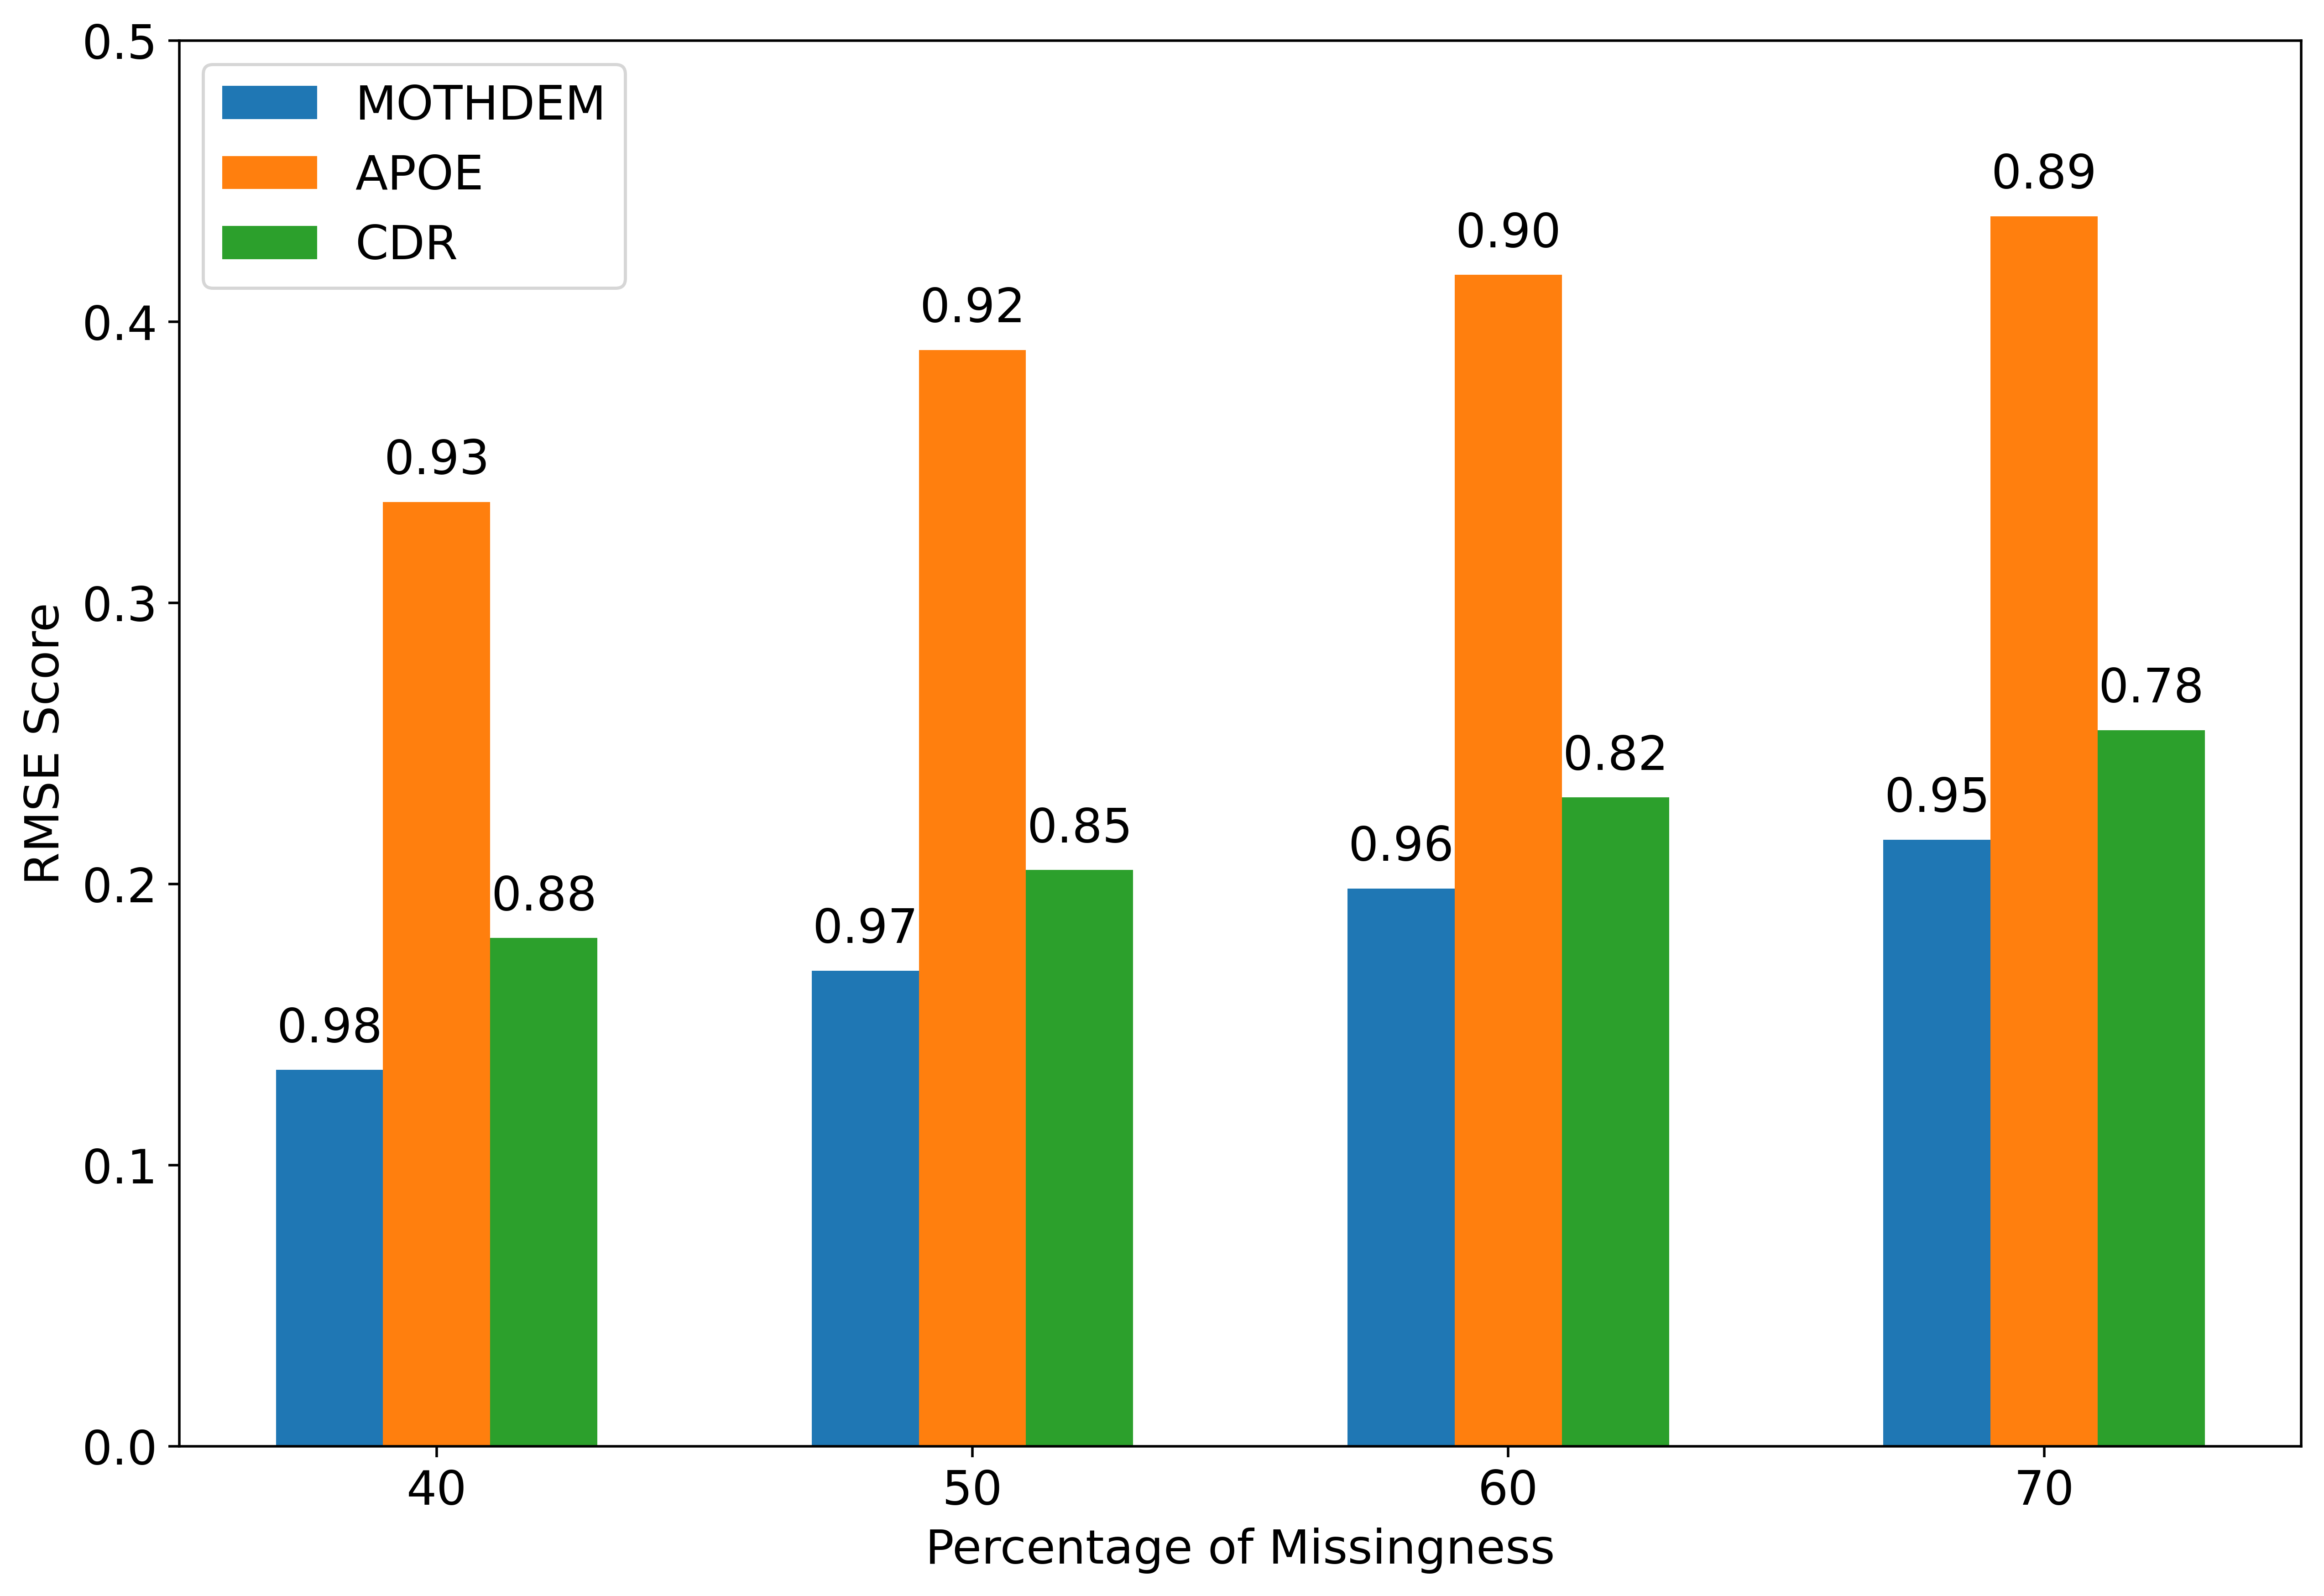

In [1]:
# Visualising RMSE scores and accuracy at different levels of missingness
import matplotlib.pyplot as plt
import numpy as np

# Giving the RMSE scores for each feature at each percentage of missingness
mothdem_rmse = [0.1338, 0.1691, 0.1983, 0.2157]  # RMSE scores for 'MOTHDEM' at 40%, 50%, 60%, and 70% missingness
apoe_rmse = [0.3358, 0.3899, 0.4166, 0.4375]      # RMSE scores for 'APOE' at 40%, 50%, 60%, and 70% missingness
cdr_rmse = [0.1807, 0.2049, 0.2307, 0.2547]       # RMSE scores for 'CDR' at 40%, 50%, 60%, and 70% missingness

# Giving the accuracy values for each feature at each percentage of missingness
mothdem_accuracy = [0.98, 0.97, 0.96, 0.95]  # Accuracy values for 'MOTHDEM' at 40%, 50%, 60%, and 70% missingness
apoe_accuracy = [0.93, 0.92, 0.90, 0.89]      # Accuracy values for 'APOE' at 40%, 50%, 60%, and 70% missingness
cdr_accuracy = [0.88, 0.85, 0.82, 0.78]       # Accuracy values for 'CDR' at 40%, 50%, 60%, and 70% missingness

# Define the percentages of missingness
percent_missingness = [40, 50, 60, 70]

# Define the width of the bars
bar_width = 0.2

# Define the positions for the bars and font size
positions_mothdem = np.arange(len(percent_missingness))
positions_apoe = [pos + bar_width for pos in positions_mothdem]
positions_cdr = [pos + bar_width*2 for pos in positions_mothdem]
plt.rcParams.update({'font.size': 15})

# Plotting the RMSE scores for each feature using a bar diagram
plt.figure(figsize=(12, 8), dpi=500)

# Plot 'MOTHDEM' RMSE scores
plt.bar(positions_mothdem, mothdem_rmse, width=bar_width, label='MOTHDEM')

# Plot 'APOE' RMSE scores
plt.bar(positions_apoe, apoe_rmse, width=bar_width, label='APOE')

# Plot 'CDR' RMSE scores
plt.bar(positions_cdr, cdr_rmse, width=bar_width, label='CDR')

# Add accuracy values as text labels on top of each bar
for i, acc in enumerate(mothdem_accuracy):
    plt.text(positions_mothdem[i], mothdem_rmse[i] + 0.01, f'{acc:.2f}', ha='center')

for i, acc in enumerate(apoe_accuracy):
    plt.text(positions_apoe[i], apoe_rmse[i] + 0.01, f'{acc:.2f}', ha='center')

for i, acc in enumerate(cdr_accuracy):
    plt.text(positions_cdr[i], cdr_rmse[i] + 0.01, f'{acc:.2f}', ha='center')

# Add labels and title
plt.xlabel('Percentage of Missingness', fontsize=15)
plt.ylabel('RMSE Score', fontsize=15)
plt.xticks([pos + bar_width for pos in positions_mothdem], percent_missingness)
plt.legend(loc='upper left', fontsize=15)

# Set y-axis limit
plt.ylim(0, 0.5)

# Show the plot
plt.show()


In [2]:
# Checking the normality of the RMSE scores obtained for each features at different missingness levels.
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Define the RMSE scores for each feature at each percentage of missingness
mothdem_rmse = [0.1338, 0.1691, 0.1983, 0.2157]
apoe_rmse = [0.3358, 0.3899, 0.4166, 0.4375]
cdr_rmse = [0.1807, 0.2049, 0.2307, 0.2547]
percent_missingness = [40, 50, 60, 70]

# Analyze the values
print("RMSE Scores:")
print("MOTHDEM:", mothdem_rmse)
print("APOE:", apoe_rmse)
print("CDR:", cdr_rmse)

# Descriptive statistics for each feature across missingness levels
for feature, rmse_scores in zip(["MOTHDEM", "APOE", "CDR"], [mothdem_rmse, apoe_rmse, cdr_rmse]):
    print(f"\nDescriptive Statistics for {feature} RMSE:")
    print("Mean:", np.mean(rmse_scores))
    print("Standard Deviation:", np.std(rmse_scores))
    print("Minimum:", np.min(rmse_scores))
    print("Maximum:", np.max(rmse_scores))

# Check for normality using Shapiro-Wilk test
for feature, rmse_scores in zip(["MOTHDEM", "APOE", "CDR"], [mothdem_rmse, apoe_rmse, cdr_rmse]):
    shapiro_wilk_test = stats.shapiro(rmse_scores)
    print(f"\nNormality Test ({feature}) - Shapiro-Wilk:")
    print("Statistic:", shapiro_wilk_test.statistic)
    print("p-value:", shapiro_wilk_test.pvalue)

# Choose a statistical test based on normality
# If data is normally distributed, ANOVA can be used.
# If not normally distributed, Kruskal-Wallis test can be used.

print("\nBased on the analysis:")
if all(shapiro_wilk_test.pvalue > 0.05 for _, shapiro_wilk_test in zip(["MOTHDEM", "APOE", "CDR"], [stats.shapiro(rmse_scores) for rmse_scores in [mothdem_rmse, apoe_rmse, cdr_rmse]])):
    print("The data appears to be normally distributed.  Proceed with ANOVA to compare the means of RMSE scores across different missingness levels.")
else:
    print("The data may not be normally distributed. Proceed with the Kruskal-Wallis test as a non-parametric alternative to ANOVA.")

RMSE Scores:
MOTHDEM: [0.1338, 0.1691, 0.1983, 0.2157]
APOE: [0.3358, 0.3899, 0.4166, 0.4375]
CDR: [0.1807, 0.2049, 0.2307, 0.2547]

Descriptive Statistics for MOTHDEM RMSE:
Mean: 0.179225
Standard Deviation: 0.03106536455604537
Minimum: 0.1338
Maximum: 0.2157

Descriptive Statistics for APOE RMSE:
Mean: 0.39495
Standard Deviation: 0.03809018902552205
Minimum: 0.3358
Maximum: 0.4375

Descriptive Statistics for CDR RMSE:
Mean: 0.21775
Standard Deviation: 0.027707535076220684
Minimum: 0.1807
Maximum: 0.2547

Normality Test (MOTHDEM) - Shapiro-Wilk:
Statistic: 0.9684882164001465
p-value: 0.8321002721786499

Normality Test (APOE) - Shapiro-Wilk:
Statistic: 0.9521636962890625
p-value: 0.7296530604362488

Normality Test (CDR) - Shapiro-Wilk:
Statistic: 0.9904215335845947
p-value: 0.9596179127693176

Based on the analysis:
The data appears to be normally distributed.  Proceed with ANOVA to compare the means of RMSE scores across different missingness levels.


In [3]:
# Performing an ANOVA test to compare the means of RMSE scores across different levels of missingness
import numpy as np
from scipy import stats

# Define the RMSE scores for each feature at each percentage of missingness
mothdem_rmse = [0.1338, 0.1691, 0.1983, 0.2157]
apoe_rmse = [0.3358, 0.3899, 0.4166, 0.4375]
cdr_rmse = [0.1807, 0.2049, 0.2307, 0.2547]
percent_missingness = [40, 50, 60, 70]

# Reshape the data for ANOVA (features as rows, missingness levels as columns)
rmse_data = np.array([mothdem_rmse, apoe_rmse, cdr_rmse])

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*rmse_data)

# Print the ANOVA results
print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test rejects the null hypothesis that the means of RMSE scores are equal across all missingness levels. There is a statistically significant difference between at least two groups.")
else:
    print("The ANOVA test fails to reject the null hypothesis. We cannot conclude a statistically significant difference between the means of RMSE scores across all missingness levels based on this test.")


ANOVA Results:
F-statistic: 37.42019449908058
p-value: 4.3506236015219175e-05
The ANOVA test rejects the null hypothesis that the means of RMSE scores are equal across all missingness levels. There is a statistically significant difference between at least two groups.
